<a href="https://colab.research.google.com/github/efpetrova/home_task/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# п. 1 Загрузите файл HR.csv в pandas dataframe
url='https://drive.google.com/uc?id=' + '1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1'
df=pd.read_csv(url)

In [2]:
# п. 2 Рассчитайте основные статистики для переменных
# (среднее,медиана,мода,мин/макс,сред.отклонение).

df.describe(include='all') 

min_satisfaction_level = min(df['satisfaction_level']) #показываю вычисление основных статистик на примере одной переменной
max_satisfaction_level = max(df['satisfaction_level'])
print(min_satisfaction_level)
print(max_satisfaction_level)
print(max_satisfaction_level - min_satisfaction_level) # размах
print(df['satisfaction_level'].median())
print(df['satisfaction_level'].mean())
print(df['satisfaction_level'].mode()[0])
print((df['satisfaction_level']).std())

0.09
1.0
0.91
0.64
0.6128335222348166
0.1
0.2486306510611418


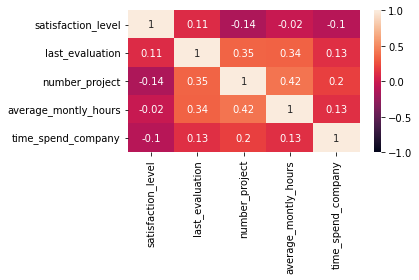

In [3]:
# п. 3 Рассчитайте и визуализировать корреляционную матрицу для
# количественных переменных.
# Определите две самые скоррелированные и две наименее скоррелированные переменные.

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
df_new=df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']].copy()
sns.heatmap(df_new.corr(),vmin = -1, vmax = +1, annot = True)
plt.tight_layout()
# из корреляционной матрицы видно, что наиболее скореллированные переменные -это average_montly_hours and number_project, а менее-average_montly_hours and satisfaction_level

In [4]:
# п. 4 Рассчитайте сколько сотрудников работает в каждом департаменте.
df.groupby(['department']).size() #  сколько сотрудников работает в каждом департаменте

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


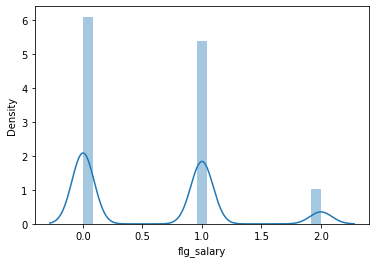

In [7]:
# п. 5 Показать распределение сотрудников по зарплатам.
df['salary'].value_counts()

def get_flag_salary(row):
  if row['salary']=='low':
    return 0
  elif row['salary']=='medium':
    return 1
  else:
    return 2

df['flg_salary']=df.apply(lambda row: get_flag_salary(row), axis=1)

sns_plot = sns.distplot(df['flg_salary'])
fig = sns_plot.get_figure()

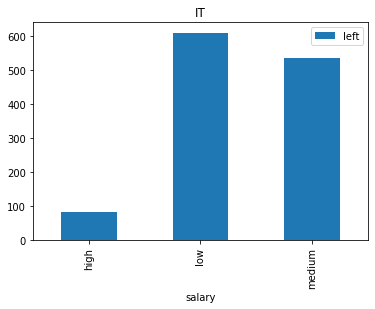

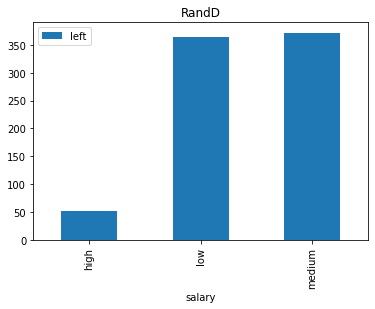

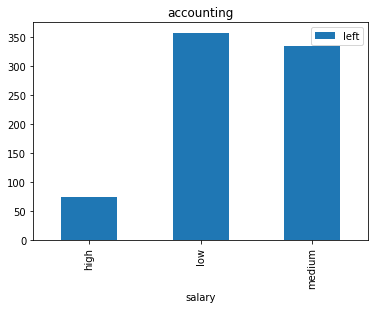

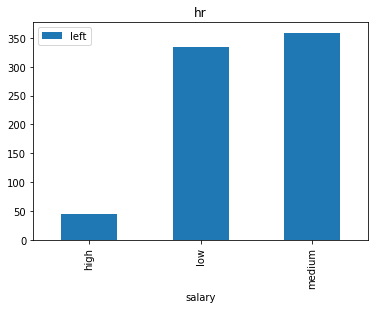

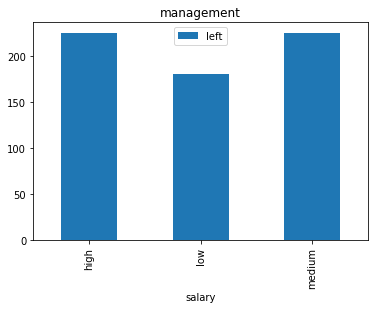

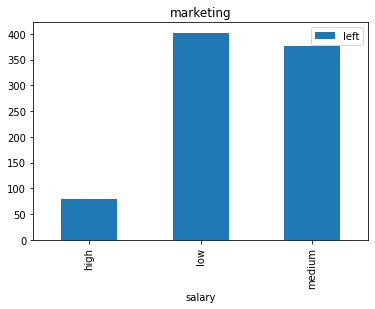

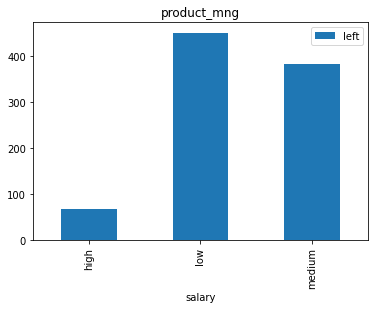

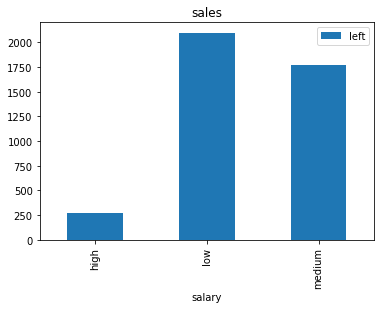

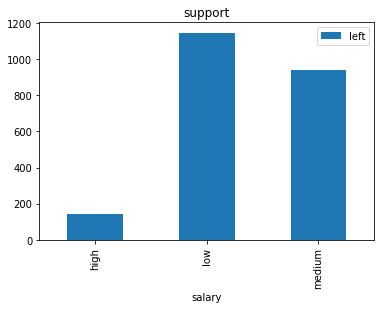

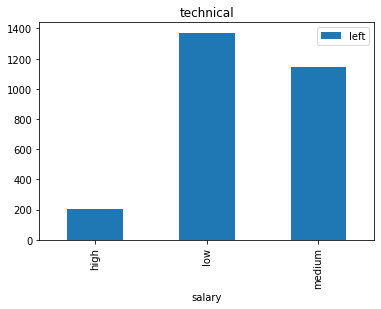

In [8]:
# п. 6 Показать распределение сотрудников по зарплатам в каждом
# департаменте по отдельности
df_new=df.groupby(["department","salary"]).agg({'left':'count'})

for dept, df_sub in df_new.reset_index().groupby(['department']):
  df_sub.set_index('salary').plot.bar(title=dept)

In [ ]:
#7 skipped
df_salary=df.groupby(["salary"]).agg({'average_montly_hours':['mean', 'sum', 'std']})
df_salary

average_montly_hours                    
                       mean      sum        std
salary                                         
high             199.867421   247236  47.710446
low              200.996583  1470491  50.832214
medium           201.338349  1297827  49.344188

In [9]:
# п. 8 
retired =df[df["left"]==1]
all_retired = df[df["left"]==1].shape[0]
retired_5years = retired[retired["promotion_last_5years"]==1].shape[0] # уволившиеся сотрудники,у которых было повышение за последние 5 лет
shared_retired= (100*retired_5years)/all_retired # # 0,53% доля сотрудников(уволившихся) с повышением за последние 5 лет
retired['satisfaction_level'].mean() #средняя степень удовлетворенности
retired['number_project'].mean() # среднее количество проектов


workers =df[df["left"]==0]
all_workers = df[df["left"]==0].shape[0]
workers_5years = workers[workers["promotion_last_5years"]==1].shape[0] #  сотрудники,у которых было повышение за последние 5 лет
shared_workers= (100*workers_5years)/all_workers #доля сотрудников(уволившихся) с повышением за последние 5 лет
workers['satisfaction_level'].mean() #средняя степень удовлетворенности
workers['number_project'].mean() # среднее количество проектов

3.786664333216661

In [10]:
# п. 9
df_1=df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']].copy()
df_class=df[["left"]].copy()
df_class= np.concatenate(df_class.to_numpy())

# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_1, df_class, test_size=0.25)

In [11]:
len(y_test)

3750

In [13]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing
lda = LinearDiscriminantAnalysis()


le = preprocessing.LabelEncoder()    
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [14]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [15]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,0
1,1,0
2,0,0
3,0,1
4,0,0
...,...,...
3745,0,1
3746,0,0
3747,0,0
3748,0,0


In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test)) # точность верных прогнозов